# Week3授業前課題1 アヤメを分析しよう

## 【課題1】データの取得
以下のドキュメントを参考にしながら、irisデータセット読み込みましょう。

sklearn.datasets.load_iris — scikit-learn 0.20.2 documentation

データが読み込めたら、説明変数を下のようなPandasのDataFrame型変数Xに格納してください。列の名前も以下を参考にしてください。
目的変数も同様にyに格納してください。

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
data.target[[10, 25, 50]]
list(data.target_names)

['setosa', 'versicolor', 'virginica']

In [3]:
import pandas as pd
x = pd.DataFrame(data.data)
x = x.rename(columns={0: 'sepal_length', 1: 'sepal_width', 2: 'petal_length', 3:'petal_width'})

In [5]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
y = pd.DataFrame(data.target)
y = y.rename(columns = {0: 'species'})

In [8]:
y.head()

,species
0,0
1,0
2,0
3,0
4,0


## 【課題2】データの結合
そして、これらX,yを結合させたDataFrame型変数dfを作成してください。これ以降はこのdfを使っていきます。

In [9]:
df = pd.concat([x, y], axis=1)

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 【課題3】データの確認
今回扱うデータがどのようなものなのか改めて確認します。
少なくとも以下の4点についてコードとマークダウンを組み合わせてレポートしてください。  

* 先頭から4番目までのサンプルを表示させ、各特徴量がどういったものかを見る。（数値データか文字データかなど）  

In [376]:
df.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


* ラベルごとのサンプル数の合計を出力する。  

In [377]:
df['species'].value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

* 特徴量に欠損値があるかを確認する。  

In [378]:
null_cnt = df.isnull()
print(null_cnt.sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


* 特徴量の平均値と標準偏差、四分位数を一度に表示させる。  

In [379]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 【課題4】irisデータセット自体の調査
ページのはじめで「カナダのガスペ半島のある牧草地で」と書きましたが、データセット自体についてもう少し調査しておきましょう。データセットを見る上で、そのデータセット自体について知っておくことも大切です。

* Iris setosa  
日本、中国、北アメリカ原産。青紫の花
* Iris versicolor  
アメリカ、カナダ東部原産。versicolorはvariously colouredの意味。
* Iris virginica  
北アメリカ東部原産。薄い紫色の花

## 【課題5】必要なデータを抽出
DataFrameから必要なデータを抽出する方法を確認していきます。

* sepal_widthの列を３つの異なる方法で抽出する

In [380]:
c1 = df['sepal_width']
c2 = c1 = df.sepal_width
c3 = df.loc[:, ['sepal_width']]

print(c1[0:5], "\n")
print(c2[0:5], "\n")
print(c3[0:5], "\n")

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64 

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal_width, dtype: float64 

   sepal_width
0          3.5
1          3.0
2          3.2
3          3.1
4          3.6 



* 50番目から99番目までのデータを抽出する

In [381]:
c4 = df.loc[50:99]
print(c4.head())
print(c4.tail())

    sepal_length  sepal_width  petal_length  petal_width  species
50           7.0          3.2           4.7          1.4        1
51           6.4          3.2           4.5          1.5        1
52           6.9          3.1           4.9          1.5        1
53           5.5          2.3           4.0          1.3        1
54           6.5          2.8           4.6          1.5        1
    sepal_length  sepal_width  petal_length  petal_width  species
95           5.7          3.0           4.2          1.2        1
96           5.7          2.9           4.2          1.3        1
97           6.2          2.9           4.3          1.3        1
98           5.1          2.5           3.0          1.1        1
99           5.7          2.8           4.1          1.3        1


* petal_lengthの列の50番目から99番目までのデータを抽出する

In [382]:
c5 = df.loc[50:99, ['petal_length']]
print(c5.head())
print(c5.tail())

    petal_length
50           4.7
51           4.5
52           4.9
53           4.0
54           4.6
    petal_length
95           4.2
96           4.2
97           4.3
98           3.0
99           4.1


* petal_widthの値が0.2のデータを抽出する

In [383]:
c6 = df.query('petal_width == 0.2')
c6

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


In [384]:
c7 =  df.loc[df.petal_width == 0.2]
c7

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


.locや.ilocを使うことになります。この２つはどう違うのかについても説明してください。  
-> locは行や列のラベルで、ilocは行や列の番号で指定するメソッド

## 【課題6】図の作成
データは可視化して確認することが大切です。図を作成していきましょう。Matplotlibやseabornを使ってください。

* ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）  

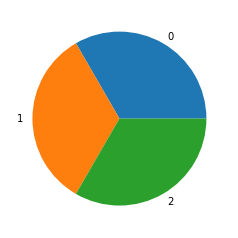

In [385]:
import matplotlib.pyplot as plt
lbl1 = df['species'].unique()

plt.pie(df.species.value_counts(), labels=lbl1);


* 特徴量を一つ選び、boxplotを使ってラベルごとのデータの分布を可視化する  

Text(0, 0.5, 'sepal_length [cm]')

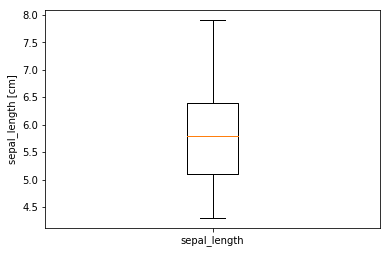

In [386]:

plt.boxplot([df.sepal_length], labels = ['sepal_length']);
plt.ylabel('sepal_length [cm]')

* 特徴量を一つ選び、violinplotを使ってラベルごとのデータの分布を可視化する  
boxplotとviolinplotは似た図を表示します。これらはどう違い、それぞれどのような利点があるのか説明してください。  
-> boxplotはデータのばらつきをわかりやすく表現した図。最大値、最小値、各四分位点がわかる。violinplotは縦軸の統計量情報に加えて、横軸側に確率密度の分布を描いたもの。

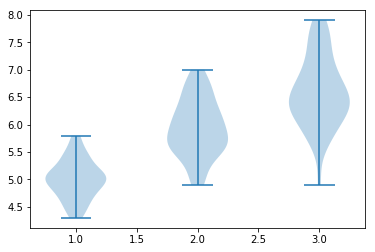

In [387]:
d1 = df.sepal_length.loc[df.species == 0]
d2 = df.sepal_length.loc[df.species == 1]
d3 = df.sepal_length.loc[df.species == 2]


plt.violinplot([d1, d2, d3]);

## 【課題7】特徴量間の関係の確認
特徴量間の関係を見ていきます。

* 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る  

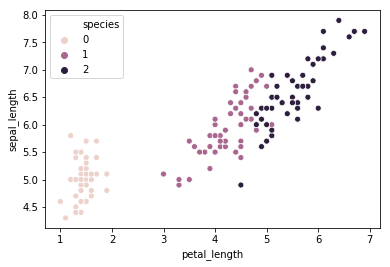

In [388]:
import seaborn as sns

sns.scatterplot(x='petal_length', y='sepal_length', hue='species', data=df);

* 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る

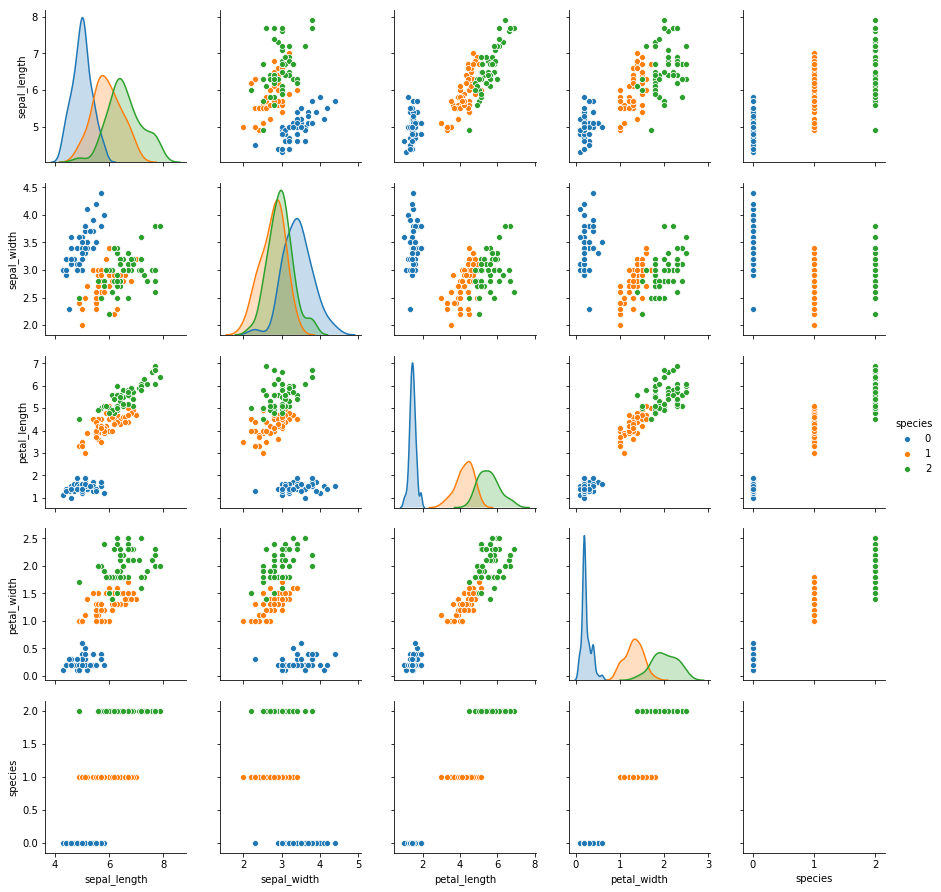

In [394]:
sns.pairplot(df, hue='species');

* ４つの特徴量に関する相関係数行列を作る

In [395]:
df_corr = df.corr()
df_corr = df_corr.iloc[[0, 1, 2, 3],[0, 1, 2, 3]]

* 相関係数行列のヒートマップを作る

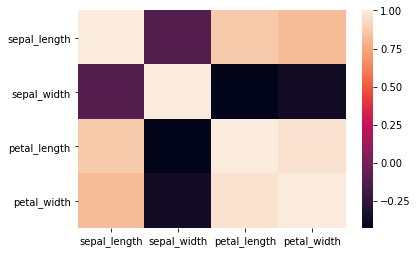

In [397]:
sns.heatmap(df_corr);

## 【課題8】簡単な考察
データを探索した時には、考察をすることが大切です。散布図行列を見ながら、3種類の花はどういう風に分けられそうかを簡単に考えて説明してください。

* sepal_lengthはsetosa, versicolor, virginicaの順で大きくなっているが、分布の被りが大きい。
* sepal_widthは３種の花で分布図が被っており、分類のための特徴量としては使いにくい。setosaではsepal_widthが長い方向にわずかに分布が寄っている。
* petal_lengthに関しては値がsetosa<<versicolor<virginicaとなっており、setosaと他の２種で分布が被っていないので、この情報のみからでも分類できそう。versicolorとvirginicaに関しては分布図の裾野の部分での被りがあるため、petal_lengthのみから特定は難しそう。
* petal_widthはpetal_lengthと相関が高い。

petal_lengthとpetal_widthの２つの特徴量をx, yにとってプロットすることで、どちらか一方の特徴量の分布図だけでは被りがあって分離できなかったversicolorと　virgicolorも精度よく分離できそう。

| Feature | 0: setosa | 1: versicolor | 2: virginica |
|:------------:|:------------:|:------------:|:------------:|
| sepal_length | slightly short | midium | slightly long |
| sepal_width | minor difference | minor difference | minor difference |
| petal_length | short | midium | long |
| petal_width | short | midium | long |

